<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/1_Introduction_and_OPA_amplifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Introduction and OPA amplifiers
### October 4th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 04/10/2021

1. Instrumentation configuration
2. Probe compensation
3. Half-wave diode rectifier
4. OPA zero crossing 
5. OPA inverting zero crossing
6. OPA slew rate frequency sweep
7. OPA open ring biased threshold
8. OPA closed loop non inverting G = 2
9. OPA closed loop non inverting G = 10
10. OPA closed loop inverting bode plots for G = 1
11. OPA closed loop inverting bode plots for G = 10


## Configuration

### Clone the GIT

In [1]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (381/381), done.
remote: Compressing objects: 100% (304/304), done.
remote: Total 381 (delta 188), reused 173 (delta 65), pack-reused 0
Receiving objects: 100% (381/381), 16.91 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (188/188), done.


### Install environment

In [2]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

### Importa moduli [COLAB]

In [11]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle

#Pickle with dict of Numpy arrays

/content


### Funzioni per l'importazione file Tektronix

In [59]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

## Half-wave rectifier

/content
dict_keys(['Record lenght', 'Sample interval', 'Trigger point', 'Source', 'Vertical units', 'Vertical scale', 'Vertical offset', 'Horizontal units', 'Horizontal scale', 'Pt FMT', 'Y zero', 'Probe atten', 'Model', 'Serial', 'Firmware', 'Data'])

Valore di Delta V =  0.6399999999999997  V


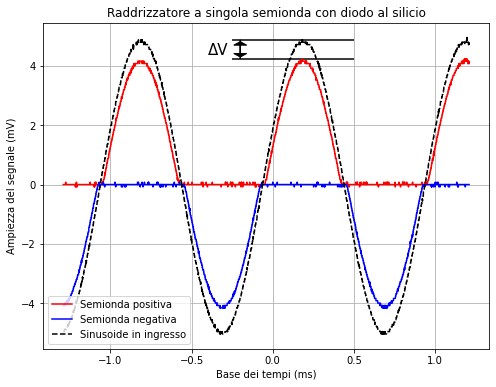

In [165]:
%cd /content

ch1_f = openTek('./Electronics-2021-UNITO/data-source/4-10-21/half_wave_rectifier_hi/F0002CH1.CSV')
ch2_f = openTek('./Electronics-2021-UNITO/data-source/4-10-21/half_wave_rectifier_hi/F0002CH2.CSV')
ch1_l = openTek('./Electronics-2021-UNITO/data-source/4-10-21/half_wave_rectifier_lo/F0003CH1.CSV')
ch2_l = openTek('./Electronics-2021-UNITO/data-source/4-10-21/half_wave_rectifier_lo/F0003CH2.CSV')
print(ch2_f.keys())

input_1 = ch1_f['Data'].to_numpy()
upper_half_wave = ch2_f['Data'].to_numpy()

input_2 = ch1_l['Data'].to_numpy()
lower_half_wave = ch2_l['Data'].to_numpy()

time1 = upper_half_wave.transpose()[0]
time2 = lower_half_wave.transpose()[0]
input_1  = input_1.transpose()[1]
input_2  = input_2.transpose()[1]
upper   = upper_half_wave.transpose()[1]
lower   = lower_half_wave.transpose()[1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time1 * 1e3, upper, label = "Semionda positiva", color = 'red')
ax.plot(time2 * 1e3, lower, label = "Semionda negativa", color = 'blue')
ax.plot(time1 * 1e3, input_1, label = "Sinusoide in ingresso", color = 'black', linestyle = "--")

max_rt = upper[1250:1900].max()
max_in = input_1[1250:1900].max()

ax.hlines(max_rt, -0.25, .5)
ax.hlines(max_in, -0.25, .5)
ax.arrow(-0.20, max_rt, 0, abs(max_rt - max_in) - 0.18,  head_width = 0.08, color = "black")
ax.arrow(-0.20, max_rt + abs(max_rt - max_in), 0, -1.* abs(max_rt - max_in) + 0.18,  head_width = 0.08, color = "black")

ax.text(-0.40, max_rt + abs(max_rt - max_in) - 0.1, 'ΔV',
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=15)

ax.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (mV)',
       title='Raddrizzatore a singola semionda con diodo al silicio')
ax.grid()
ax.legend()
plt.savefig("./Electronics-2021-UNITO/analysis/output/half-wave-rectifier.pdf")

print("\nValore di Delta V = ", abs(max_rt - max_in), " V")

## Commit changes

In [163]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 

/content/Electronics-2021-UNITO
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/valeriopagliarino/Electronics-2021-UNITO
   94f43c1..81e07fd  main       -> origin/main
hint: Waiting for your editor to close the file... error: unable to start editor 'editor'
Not committing merge; use 'git commit' to complete the merge.
[main 270acc0] Plots from data analysis
Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 29.23 KiB | 14.61 MiB/s, done.
Total 8 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 3 local objects.
To https://github.com/valeriopagliarino/Electronics-2021-UNITO.git
   81e07fd..270acc0  main -> main
